In [1]:
import pandas as pd
import seaborn as sns


In [2]:
ofDf=pd.read_csv('/content/drive/MyDrive/Onlinefood/onlinefoods.csv')

In [3]:
ofDf


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [4]:
ofDf['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [5]:
ofDf['Feedback'].unique()
# array(['Positive', 'Negative '], dtype=object)  Negative มี space ตามหลังเลยหาไม่เจอ
ofDf['Feedback']=ofDf['Feedback'].str.strip()
ofDf['Feedback'].unique()




array(['Positive', 'Negative'], dtype=object)

In [6]:
ofDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [7]:
ofDf.isnull().sum() #ไม่มี null value


Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [8]:
unique= [ofDf['Marital Status'].unique(),ofDf['Monthly Income'].unique(),ofDf['Family size'].unique()]
unique

[array(['Single', 'Married', 'Prefer not to say'], dtype=object),
 array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
        '25001 to 50000'], dtype=object),
 array([4, 3, 6, 2, 5, 1])]

<Axes: xlabel='Age', ylabel='Count'>

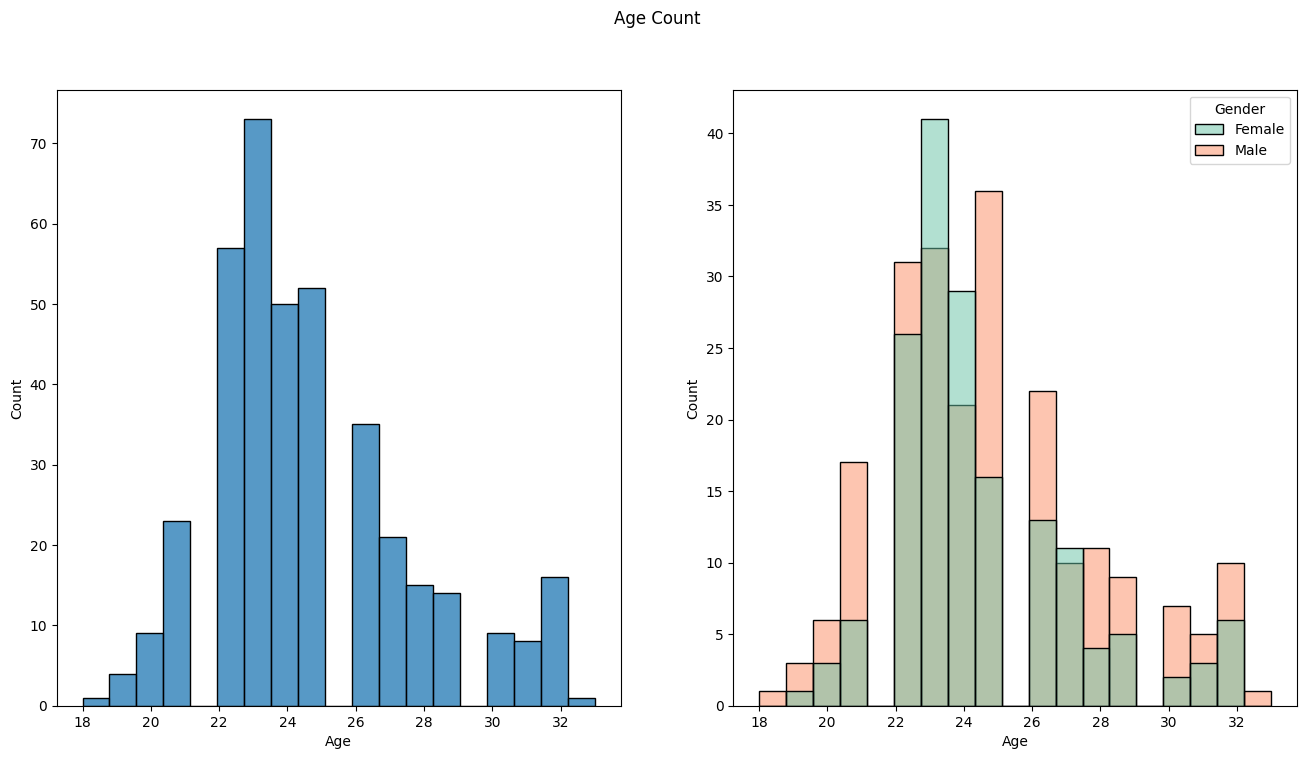

In [9]:
import matplotlib.pyplot as plt
f,axs= plt.subplots(1,2,figsize=(16,8))
f.suptitle('Age Count')
sns.histplot(ax=axs[0] ,data=ofDf,x='Age')
sns.histplot(ax=axs[1] ,data=ofDf,x='Age',hue="Gender",palette='Set2')

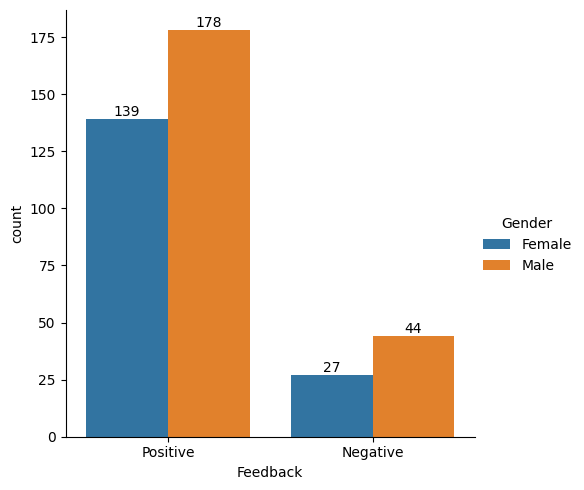

In [10]:
g =sns.catplot(data=ofDf,x='Feedback',hue='Gender',kind='count')
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])


In [11]:
mPositivePercen = (ofDf[(ofDf['Gender'] == 'Male') & (ofDf['Feedback'] == 'Positive')]).shape[0]/ofDf[ofDf['Gender']=='Male'].shape[0]*100
mNegativePercen =(ofDf[(ofDf['Gender'] == 'Male') & (ofDf['Feedback'] == 'Negative')]).shape[0]/ofDf[ofDf['Gender']=='Male'].shape[0]*100
fPositivePercen = (ofDf[(ofDf['Gender'] == 'Female') & (ofDf['Feedback'] == 'Positive')]).shape[0]/ofDf[ofDf['Gender']=='Female'].shape[0]*100
fNegativePercen =(ofDf[(ofDf['Gender'] == 'Female') & (ofDf['Feedback'] == 'Negative')]).shape[0]/ofDf[ofDf['Gender']=='Female'].shape[0]*100


ptOverall= [mPositivePercen,mNegativePercen,fPositivePercen,fNegativePercen]
ptLabel=['Male Positive','Male Negative','Female Positive','Femal Negative']

ptOverall

[80.18018018018019, 19.81981981981982, 83.73493975903614, 16.265060240963855]

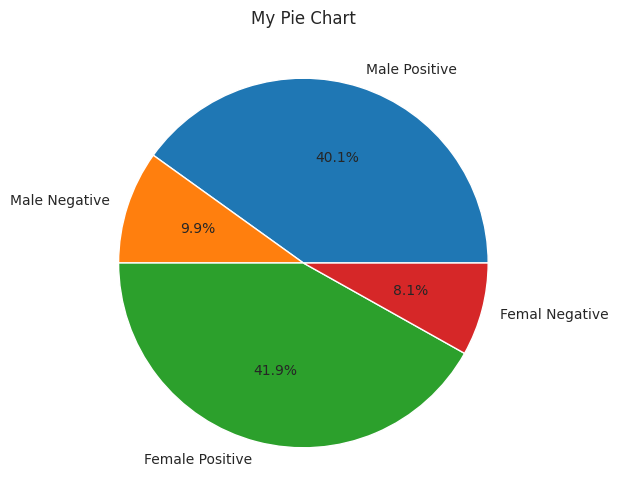

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(ptOverall, labels=ptLabel, autopct='%1.1f%%')
plt.title('My Pie Chart')
plt.show()


[Text(0, 0, '0'),
 Text(1, 0, 'Less 10k'),
 Text(2, 0, 'More 50k'),
 Text(3, 0, '10k-25k'),
 Text(4, 0, '25k-50k')]

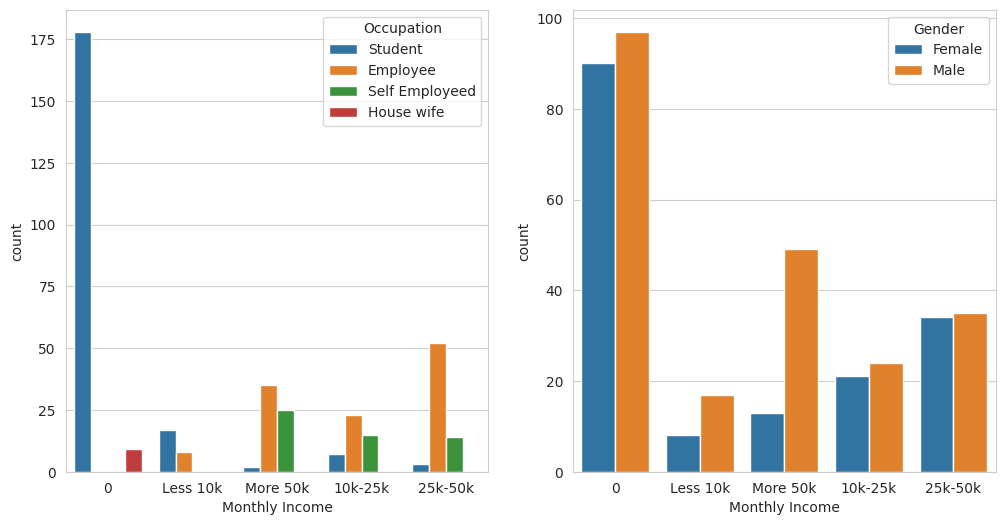

In [13]:
f,axs=plt.subplots(1,2,figsize=(12,6))

mlyIncom=['0','Less 10k','More 50k','10k-25k','25k-50k']
g=sns.countplot(ax=axs[0],data=ofDf,x='Monthly Income',hue='Occupation')
g.set_xticks(range(len(ofDf['Monthly Income'].unique())))
g.set_xticklabels(mlyIncom)

g=sns.countplot(ax=axs[1],data=ofDf,x='Monthly Income',hue='Gender')
g.set_xticks(range(len(ofDf['Monthly Income'].unique())))
g.set_xticklabels(mlyIncom)

<Axes: xlabel='Family size', ylabel='count'>

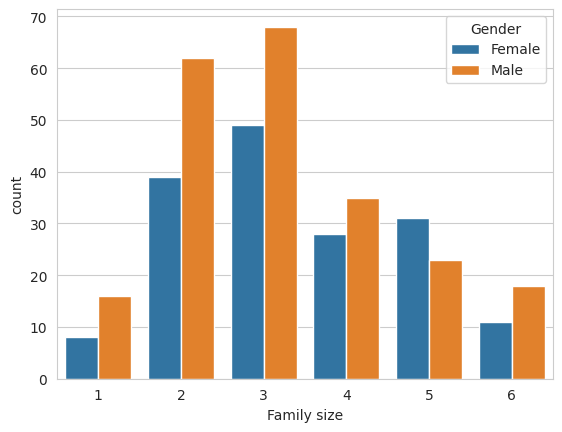

In [14]:
sns.countplot(data=ofDf,x='Family size',hue='Gender')

In [15]:
totalOrder =ofDf['Occupation'].value_counts()
totalOrder

labelOrder=ofDf['Occupation'].unique()
labelOrder

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x7eaba9120df0>,
 [Text(-0.11557176753108316, 1.093911864159879, 'Student'),
  Text(-0.43326345093633606, -1.0110800077554383, 'Employee'),
  Text(0.9183107522448852, -0.6055620218536111, 'Self Employeed'),
  Text(1.0970805962649082, -0.08008848418489117, 'House wife')],
 [Text(-0.06303914592604534, 0.5966791986326612, '53.4%'),
  Text(-0.23632551869254692, -0.5514981860484208, '30.4%'),
  Text(0.5008967739517555, -0.3303065573746969, '13.9%'),
  Text(0.5984075979626772, -0.04368462773721336, '2.3%')])

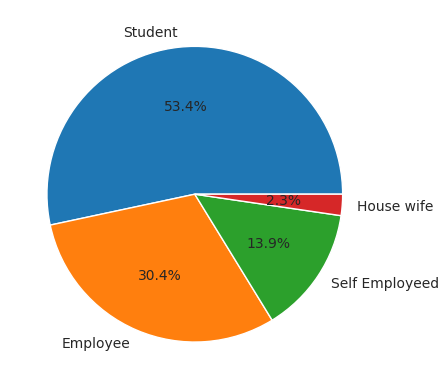

In [16]:
plt.pie(totalOrder,labels=labelOrder,autopct='%1.1f%%')